In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)

In [2]:
train_data = pd.read_csv("../main_dataset/train.csv")
print(train_data.shape)

(891, 12)


In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
# 1) By Looking at the Data there is Some skweness in the Fare otheres have comparivatively less skewness
# 2) there are no zero varancience in the numerical column

In [6]:
# Checking the Missing Values
features_with_na=[features for features in test_data.columns if test_data[features].isnull().sum()>=1]
for feature in features_with_na:
    print(feature, np.round(test_data[feature].isnull().mean()*100, 2),  ' % missing values')

NameError: name 'test_data' is not defined

In [7]:
# 3) by looking at this Data we can Drop the Cabin Column as more than 70% of data is missing

In [8]:
# Seperating the Numirical and Non Numirical data

In [9]:
numerical_features = [feature for feature in train_data.columns if train_data[feature].dtypes != 'O']
non_numerical_feature = [feature for feature in train_data.columns if train_data[feature].dtypes == 'O']

In [10]:
# in Numeric Data Try to find the Discrete data and Continuous Data

In [11]:
numerical_features

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [12]:
# to find the Discrete Data in the Numeric data
for feature in numerical_features:
    if feature != "Survived": # survived is the Target Column
        print(f'{feature} => {len(train_data[feature].unique())}')

PassengerId => 891
Pclass => 3
Age => 89
SibSp => 7
Parch => 7
Fare => 248


In [13]:
## we will be removing the Passenger Id
# 4) By Looking at the Data Age and Fare are Continuous data rest others are Discrete Data

In [14]:
discrete_numerical_feature=[feature for feature in numerical_features if len(train_data[feature].unique())<25 and feature]
print("Discrete Numerical Variable Count : {}".format(len(discrete_numerical_feature)))

Discrete Numerical Variable Count : 4


<AxesSubplot:ylabel='Survived'>

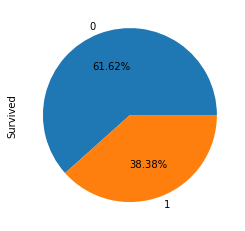

In [15]:
train_data['Survived'].value_counts().plot.pie(autopct = '%1.2f%%')

In [16]:
# 5) By Looking at the Pie Chart Data is Fairly Balanced data 

In [17]:
continuous_numerical_feature=[feature for feature in numerical_features if len(train_data[feature].unique())>25 and feature != "PassengerId"]
print("Continuous Numerical Variable Count : {}".format(len(continuous_numerical_feature)))

Continuous Numerical Variable Count : 2


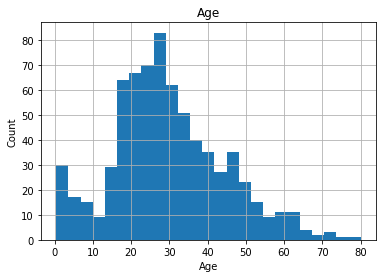

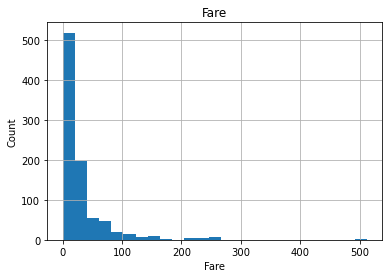

In [19]:
for feature in continuous_numerical_feature:
    data=train_data.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

In [20]:
# 6) By Looking at this Data Continuous data are Skewed

--------------------------------Sex--------------------------------------
Sex
female    314
male      577
Name: Sex, dtype: int64


Survived    0    1
Sex               
female     81  233
male      468  109


c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


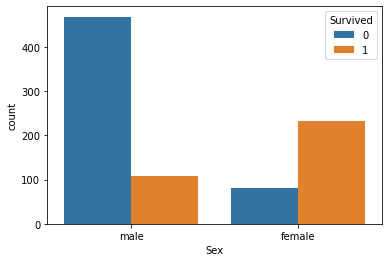

c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


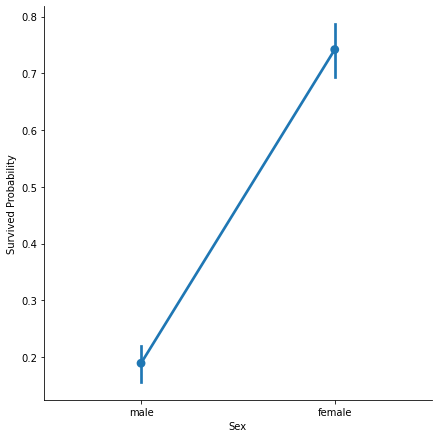

--------------------------------------------------------------------------------


--------------------------------Embarked--------------------------------------
Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64


Survived    0    1
Embarked          
C          75   93
Q          47   30
S         427  217


c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


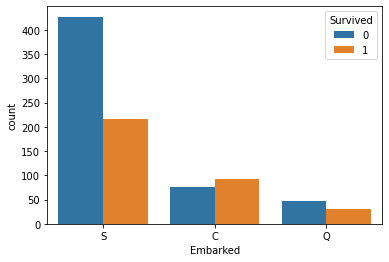

c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


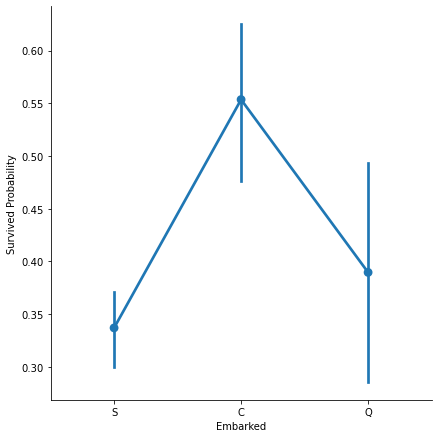

--------------------------------------------------------------------------------


--------------------------------Pclass--------------------------------------
Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64


Survived    0    1
Pclass            
1          80  136
2          97   87
3         372  119


c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


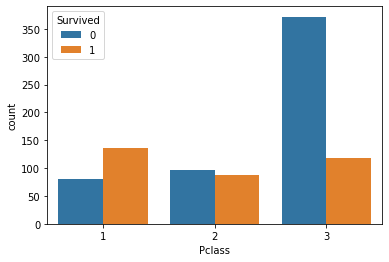

c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


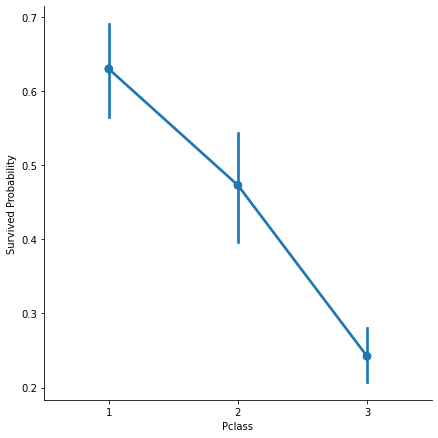

--------------------------------------------------------------------------------


--------------------------------SibSp--------------------------------------
SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64


Survived    0    1
SibSp             
0         398  210
1          97  112
2          15   13
3          12    4
4          15    3
5           5    0
8           7    0


c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


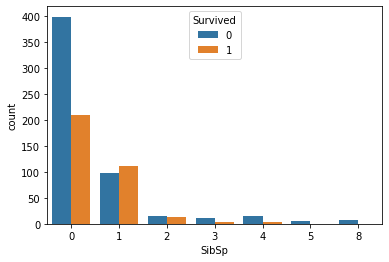

c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


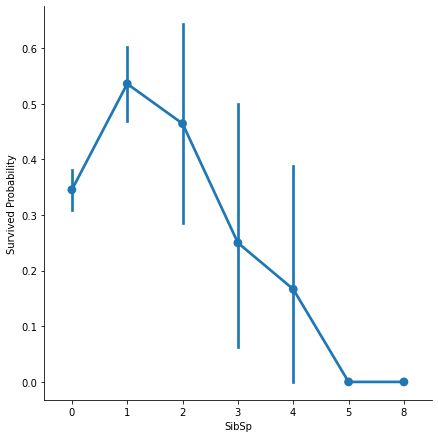

--------------------------------------------------------------------------------


--------------------------------Parch--------------------------------------
Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64


Survived    0    1
Parch             
0         445  233
1          53   65
2          40   40
3           2    3
4           4    0
5           4    1
6           1    0


c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


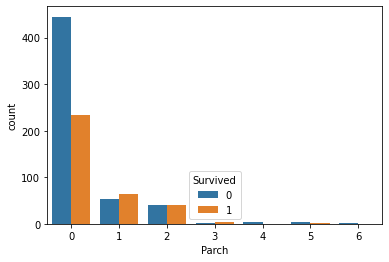

c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


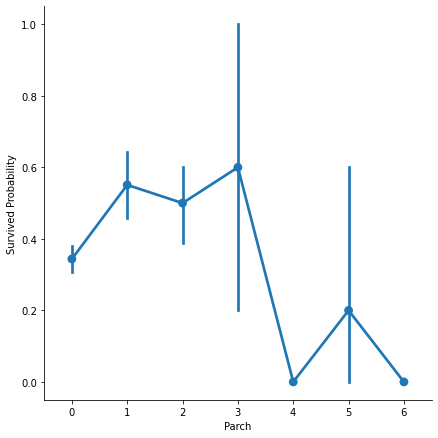

--------------------------------------------------------------------------------




In [25]:
for feature in non_numerical_feature+discrete_numerical_feature:
    if feature != "Name" and feature != "Ticket" and feature != "Cabin" and feature != "Survived":
        print(f"--------------------------------{feature}--------------------------------------")
        print(train_data.groupby(feature)[feature].count())
        print("\n")
        print(pd.crosstab(train_data[feature], train_data["Survived"]))
        sns.countplot(feature, data = train_data, hue = 'Survived')
        plt.show()
        g = sns.factorplot(x=feature, y="Survived", data=train_data, size=6)
        g.set_ylabels("Survived Probability")
        plt.show()
        print(f"--------------------------------------------------------------------------------\n\n")
    

In [23]:
# 7) for the SEX
#     Male are More than Female
#     by looking at the Survival % of the Female have survived more than Male
# 8) For the Embarked
#     S > C > Q (order of the Value in Decending)
#     by Looking at the Graph Survival % is  C > Q > S 
# 9) for P Class
#     3 > 1 > 2 (order of the Value in Decending)
#     by Looking at the Graph Survival % is 1 > 2 > 3
# 10) SibSp
#     Survival % is higest in SibSp 1 then comes others
# 11) Parch
#     Survival % is higest in 3 then comes others 

In [24]:
# Age with respect to the Fare and PClass

c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 28.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\melwin\.conda\envs\tutorialdatascience\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\users\mel

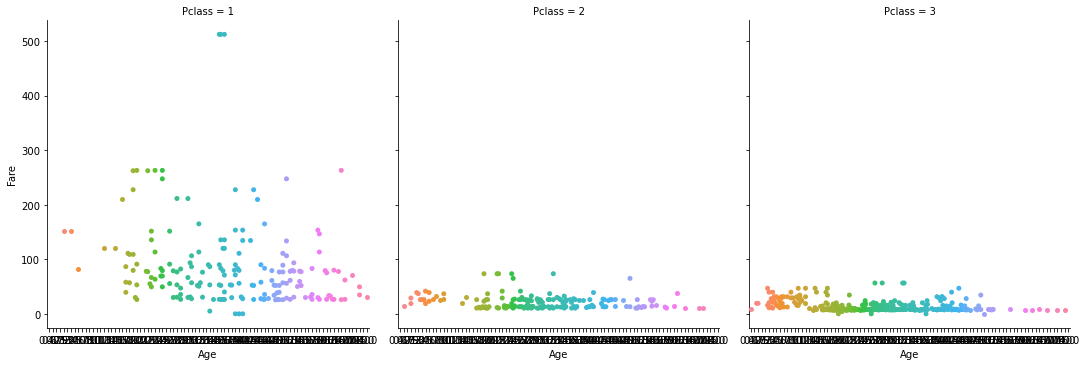

In [34]:
sns.catplot(x = 'Age', y = 'Fare', data = train_data, kind = 'swarm', col='Pclass')

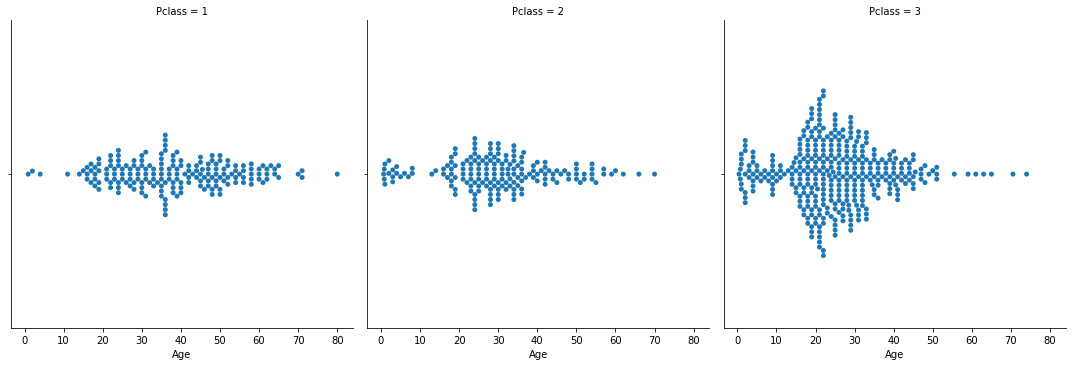

In [28]:
sns.catplot(x = 'Age', col = 'Pclass', data = train_data, kind = 'swarm')